## Proyecto de Fíisca Computacional (semestre 2025-2).

## Título del Proyecto: Simulación de la Violación de la desigualdad de Bell en el estado entrelazado singlete.

## Por: Emiliano Celedon Falco.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os

EL proposito del Proyecto es simular un experimento tipo EPR (Einstein-Podolsky-Rosen) con dos partículas entrelazadas y estudiar cuándo se viola la desigualdad de Bell, que es una predicción clásica que contradice la mecánica cuántica.

Lo primero que debos hacer es definir los estados de Spin up y down.

$\ket{u} = \begin{pmatrix}
1\\
0\\
\end{pmatrix}$  

$\ket{d} = \begin{pmatrix}
0\\
1\\
\end{pmatrix} $

además del estado entrelazado Singlete $\ket{\psi^{-}}$: 

$\ket{sing} = \frac{1}{\sqrt{2}} [\ket{ud}-\ket{du}]$

In [26]:
# Definición de los estados base como vectores uno dimencionales
up = np.array([1, 0], dtype=complex)
down = np.array([0, 1], dtype=complex)

# Estado singlete
psi_menos = (np.kron(up, down) - np.kron(down, up)) / np.sqrt(2)

Ahora definamos las matrices de Pauli, que representan los operadores de espín en las direcciones $(x,y,z)$ y se denotan como:

$ \sigma_{x} = \begin{pmatrix}
0 & 1\\
1 & 0\\
\end{pmatrix}$ 

$ \sigma_{y} = \begin{pmatrix}
0 & -i\\
i & 0\\
\end{pmatrix}$  

$ \sigma_{z} = \begin{pmatrix}
1 & 0\\
0 & -1\\
\end{pmatrix}$  

Estas nos ayudaran posteriormente para poder definir el operador de espín.

In [24]:
# Matrices de Pauli con sus elementos complejos
sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)

Seguímos y definimos el Operador de espín $A$ dependiente del ángulo, que En lugar de medir solo en el eje $z$, considerara direcciones arbitrarias en el plano $XZ$, usando operadores de espín dependientes de un ángulo:

$A(\theta) = \cos(\theta)\sigma_{z} + \sin(\theta) \sigma_{x}$
 
Esto refleja cómo elegir la dirección del aparato de medida.


In [22]:
# Operador de espín en el plano XZ, A(θ) = cos(θ)*σ_z + sin(θ)*σ_x.

def spin_operador(theta):
    return np.cos(theta) * sigma_z + np.sin(theta) * sigma_x

Por convención se considera que los observadores $\textbf{Alice}$ y $\textbf{Bob}$ denotados simplemente como $(A,B)$ serán desde los cuales se harán las mediciones necesarias de las partículas entrelazdas.

Para cada par de ángulos $(\theta_{A},\theta_{B})$, se calcula la correlación esperada $E$.

$E(\theta_{A},\theta_{B}) = \bra{\psi^{-}} A(\theta_{A}) \otimes B(\theta_{B}) \ket{\psi^{-}}$

Debe ser un valor numérico entre -1 y 1 que indicara cuán correlacionados o anticorrelacionados están los resultados delas dos mediciones, si el valor de $E=-1$, los resultados están perfectamente anticorrelacionados.

In [28]:
# Función de correlación  E(θ_A, θ_B) = ⟨ψ⁻ | (A(θ_A) ⊗ B(θ_B)) | ψ⁻⟩
def correlacion(theta_A, theta_B):
    A = spin_operador(theta_A)
    B = spin_operador(theta_B)
    observable = np.kron(A, B)  # será el Operador conjunto
    # se calcula el producto interno ⟨ψ⁻| observable |ψ⁻⟩
    return np.real(np.dot(psi_menos.conj(), observable.dot(psi_menos)))

Se debe mencionar que la forma original de la desigualdad de Bell original es:

$1+E(b,c) \geq |E(a,b) - E(a,c)|$

Pero para propósitos de este trabajo, utilizaremos la forma conocida como Desigualdad ${CHSH}$, porque nos da límites clásicos a la correlación esperada para el experimento que se plantea, haciendo más sencilla la visualización de la violación de la desigualdad.

utilizamos $θ$ y $θ'$ dado que cada observador puede medir el espín en una de dos direcciones, es decir que tiene dos opciones de medición posible.

Definamos entonces el parámetro $S$ el cual representa el nivel de violación de realismo local. 

$S = |E(\theta_{A},\theta_{B}) + E(\theta_{A},\theta'_{B}) + E(\theta'_{A},\theta_{B}) - E(\theta'_{A},\theta' _{B})| \leq 2$

Las teorías de variables ocultas clásicas, impoenen que $|S| \leq 2$, mientras que la mecánica cuántica predice un valor máximo de $S = 2\sqrt{2} \approx 2.828$.

In [31]:
# Función S_CHSH = | E(θ_A, θ_B) + E(θ_A, θ_B') + E(θ_A', θ_B) - E(θ_A', θ_B') |
def S_CHSH(theta_A, theta_Ap, theta_B, theta_Bp):
    return abs(
        correlacion(theta_A, theta_B)
        + correlacion(theta_A, theta_Bp)
        + correlacion(theta_Ap, theta_B)
        - correlacion(theta_Ap, theta_Bp)
    )

# Ángulos óptimos conocidos para la violación máxima:
theta_A  = 0
theta_Ap = np.pi / 2
theta_B  = np.pi / 4
theta_Bp = -np.pi / 4

S_valor = S_CHSH(theta_A, theta_Ap, theta_B, theta_Bp)
print("S =", S_valor)


S = 2.82842712474619


Como podemos ver, con las condiciones adecudas para el experimento tales como considerar los ángulos $𝜃_{𝐴} = 0 $, $𝜃_{𝐵} = \frac{\pi}{2}$, $𝜃'_{A} =\frac{\pi}{4}$ Y $𝜃'_{𝐵} = -\frac{\pi}{4}$, se cumple que $|S| \geq 2$, violnado así la $\textbf{desigualdad de Bell tipo CHSH}$.


Para visualizar qué combinaciones de ángulos $𝜃_{𝐴}$ y $𝜃_{𝐵}$ violan la desigualdad, generamos una malla de ángulos $(θ_{A}, θ_{B})$ para construir un mapa bidimensional de valores de $S$, que luego se visualizara como un mapa de
calor.

$θ_{A}, θ_{B}$ recorre valores de $0$ a $\pi$. 

Y fijamos $𝜃'_{A} = \frac{\pi}{2}$ y $𝜃'_{B} = -\frac{\pi}{4}$, observamos cómo se modifica la posibilidad de violación.

Las regiones donde $𝑆 > 2$ muestran violación cuántica. Este mapa ayuda a ver gráficamente cuándo y cómo ocurre la violación.

El mapa Recorre valores de $θ_{A}$ y $θ_{B}$, manteniendo fijos $θ'_{A}$ y $θ'_{B}$, y se construye una matriz con los valores de S. 

En cada punto del mapa se calcula el valor de $S = |E(\theta_{A},\theta_{B}) + E(\theta_{A},\theta'_{B}) + E(\theta'_{A},\theta_{B}) - E(\theta'_{A},\theta' _{B})|$

Se muestran las regiones donde $S > 2$, Las zonas que superan este valor ( las de color más cálido) violan la desigualdad de Bell. La línea blanca indica la región donde $s = 2$, es decir, el límite clásico.

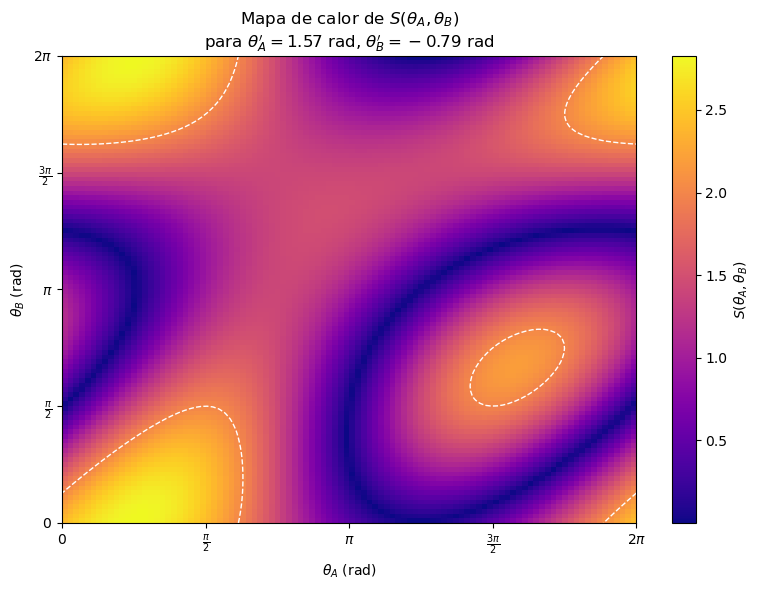

In [39]:
# Malla de ángulos
theta_vals = np.linspace(0, 2 * np.pi, 100)
S_matriz = np.zeros((len(theta_vals), len(theta_vals)))

# Ángulos primos fijos
theta_Ap = np.pi / 2
theta_Bp = -np.pi / 4

# Llenar la matriz de S
for i, theta_A in enumerate(theta_vals):
    for j, theta_B in enumerate(theta_vals):
        S_matriz[i, j] = S_CHSH(theta_A, theta_Ap, theta_B, theta_Bp)

# Crear la gráfica
plt.figure(figsize=(8, 6))
im = plt.imshow(S_matriz,
                extent=[0, 2*np.pi, 0, 2*np.pi],
                origin='lower',
                cmap='plasma',
                aspect='auto')
cbar = plt.colorbar(im)
cbar.set_label('$S(\\theta_A, \\theta_B)$')
plt.contour(theta_vals, theta_vals, S_matriz,
            levels=[2], colors='white', linestyles='--', linewidths=1)
plt.title(f'Mapa de calor de $S(\\theta_A, \\theta_B)$\n'
          f'para $\\theta_A\' = {theta_Ap:.2f}$ rad, $\\theta_B\' = {theta_Bp:.2f}$ rad')
plt.xlabel('$\\theta_A$ (rad)')
plt.ylabel('$\\theta_B$ (rad)')
pi_labels = [r'$0$', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$']
pi_locs = [0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi]
plt.xticks(pi_locs, pi_labels)
plt.yticks(pi_locs, pi_labels)
plt.tight_layout()
plt.savefig('S_mapadecalor_thetaA_thetaB.png', dpi=300)
plt.show()

Ahora realizamos una animación de  $S(θ_{A}, θ_{B})$ variando $ θ'_{A}(t), θ'_{B}(t)$ en el tiempo y mantiene $θ_{A}, θ_{B}$ como ejes.

$ θ'_{A}(t) \in [0,2\pi]$ y $θ'_{B}(t) = -θ'_{A}(t)$

Nos permitirá explorar cómo cambia y en dónde se presenta la violación (valores mayores a $2$) de la desigualdad, además de ver cándo se maximiza la violación.


In [41]:
folder = "frames_animacion"
os.makedirs(folder, exist_ok=True)

# Rango de ángulos θ_A y θ_B
theta_vals = np.linspace(0, 2 * np.pi, 100)

# Animación: variamos θ_A' y θ_B' a lo largo del tiempo
n_frames = 60
angulos_primos = np.linspace(0, 2 * np.pi, n_frames)

# Generar los cuadros
for frame, (theta_Ap, theta_Bp) in enumerate(zip(angulos_primos, -angulos_primos)):
    S_matriz = np.zeros((len(theta_vals), len(theta_vals)))
    for i, theta_A in enumerate(theta_vals):
        for j, theta_B in enumerate(theta_vals):
            S_matriz[i, j] = S_CHSH(theta_A, theta_Ap, theta_B, theta_Bp)

    # Graficar
    plt.figure(figsize=(7, 6))
    plt.imshow(S_matriz, extent=[0, 2*np.pi, 0, 2*np.pi], origin='lower', cmap='plasma', aspect='auto')
    plt.colorbar(label='$S(\\theta_A, \\theta_B)$')
    plt.contour(theta_vals, theta_vals, S_matriz, levels=[2], colors='white', linestyles='--')
    plt.title(f'Mapa de $S(\\theta_A, \\theta_B)$\ncon $\\theta_A\' = {theta_Ap:.2f}$, $\\theta_B\' = {theta_Bp:.2f}$')
    plt.xlabel('$\\theta_A$')
    plt.ylabel('$\\theta_B$')
    plt.tight_layout()
    plt.savefig(f"{folder}/frame_{frame:03d}.png", dpi=150)
    plt.close()

#Ejecutando #ffmpeg -framerate 10 -i frames_animacion/frame_%03d.png -c:v libx264 -pix_fmt yuv420p animacion_bell.mp4
# en la terminal se ejecuta el video.


Veamos que donde $𝑆>2$, representa que ahí sucede una violación a la desigualdad de manera cuántica, dado que ese comportamiento que no puede explicarse con teorías clásicas.

El mapa de calor animado nos dice para qué combinaciones de ángulos se maximiza esta violación.

Ahora, Recordemos que el parámetro $S$ depende de cuatro ángulos $S = S(𝜃_{A}, 𝜃'_{A}, 𝜃_{B}, 𝜃'_{B})$

Dado que $𝜃_{A}$ y $𝜃_{B}$ es una configuración de base de medida y $𝜃'_{A}$ y $𝜃'_{B}$ pueden ajusatrse de manera alternativa. 

Entonces, graficar $S(𝜃'_{A})$ para valores fijos de $𝜃_{A}$, $𝜃_{B}$, $𝜃'_{B}$, nos permitira ver que configuraciones altenras de medida dan lugar a una violación de la desigualdad.

Manteniedo en este caso fijos los valores: $θ_{A} = 0 $, $θ_{B} = \frac{\pi}{4}$ y $θ_{B'} = - \frac{\pi}{4}$

Esto es benéfico para poder identiifcar las regiones óptimas para configurar el experimento, fijando y varaiando variables, y visualizar la dependencia del entrelazamiento cuántico con respecto a los ángulos de medición.

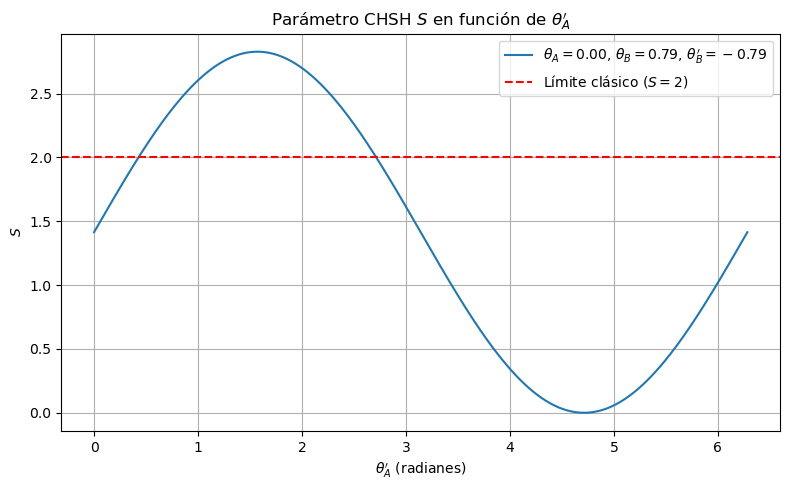

In [43]:
# Valores fijos de los otros ángulos
theta_A = 0 
theta_B = np.pi / 4
theta_Bp = -np.pi / 4

# Barrido de θ_A'
theta_Ap_vals = np.linspace(0, 2 * np.pi, 300)
S_valor = [S_CHSH(theta_A, theta_Ap, theta_B, theta_Bp) for theta_Ap in theta_Ap_vals]

# Graficar
plt.figure(figsize=(8, 5))
plt.plot(theta_Ap_vals, S_valor, label=fr"$\theta_A = {theta_A:.2f}$, $\theta_B = {theta_B:.2f}$, $\theta_B' = {theta_Bp:.2f}$")
plt.axhline(2, color='red', linestyle='--', label='Límite clásico ($S = 2$)')
plt.title(r"Parámetro CHSH $S$ en función de $\theta_A'$")
plt.xlabel(r"$\theta_A'$ (radianes)")
plt.ylabel(r"$S$")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("S_vs_thetaAp.png", dpi=300)
plt.show()

Ahora hagamsolo graficando $S(𝜃'_{A})$ y $S(𝜃'_{B})$, en una misma gráfica para un mejor análisis.

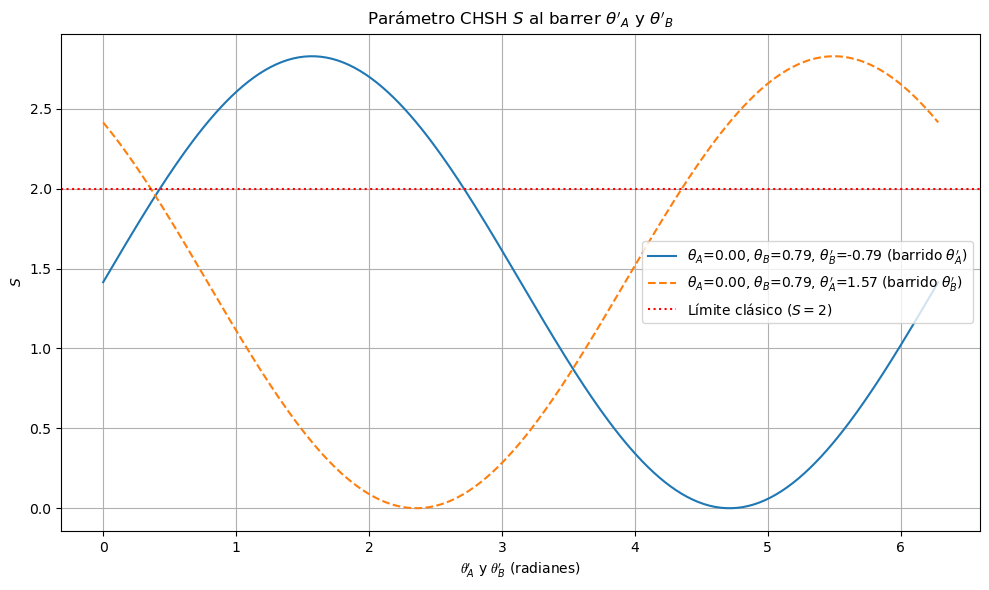

In [47]:
# Ángulos fijos para ambos barridos
theta_A = 0
theta_B = np.pi / 4
theta_Ap_fixed = np.pi / 2
theta_Bp_fixed = -np.pi / 4

# Rango de barrido para los primados
theta_prime_vals = np.linspace(0, 2 * np.pi, 300)

# Barrido en θ'_A (θ_Ap), manteniendo θ_Bp fijo
S_vals_Ap = [S_CHSH(theta_A, theta_Ap, theta_B, theta_Bp_fixed) for theta_Ap in theta_prime_vals]

# Barrido en θ'_B (θ_Bp), manteniendo θ_Ap fijo
S_vals_Bp = [S_CHSH(theta_A, theta_Ap_fixed, theta_B, theta_Bp) for theta_Bp in theta_prime_vals]

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(theta_prime_vals, S_vals_Ap, label=fr"$\theta_A$={theta_A:.2f}, $\theta_B$={theta_B:.2f}, $\theta_B'$={theta_Bp_fixed:.2f} (barrido $\theta_A'$)")
plt.plot(theta_prime_vals, S_vals_Bp, label=fr"$\theta_A$={theta_A:.2f}, $\theta_B$={theta_B:.2f}, $\theta_A'$={theta_Ap_fixed:.2f} (barrido $\theta_B'$)", linestyle='--')
plt.axhline(2, color='red', linestyle=':', label='Límite clásico ($S=2$)')

plt.title("Parámetro CHSH $S$ al barrer $\\theta'_A$ y $\\theta'_B$")
plt.xlabel("$𝜃_{A}'$ y $𝜃_{B}'$ (radianes)")
plt.ylabel("$S$")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("S_vs_thetaAp_thetaBp.png", dpi=300)
plt.show()